Installing and importing the library

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN

Initialization of a example network

In [2]:
file="../networks/rn_test.txt"
RN = pyRN.setFromText(file)
# RN=pyRN.setRandomgeneratedWithInflow()

Calculation of the Close Reactive Structrue and retriving the organizations, this is necessary for the subsequent calculation of the simple random walk. 

In [3]:
# Calculation of the generators
RN.setGenerators()
# Calculation of the Closed Reactive Strucutre
RN.setSynStr()

# Printing all organizations
list(map(RN.printSp,RN.SynStrOrgListBtArray))

Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s4, s5, s6, s7, s8,}
Species:  {s4, s6, s8,}
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s7, s9,}


[None, None, None, None, None]

Testing directly below function, this function is use later for calculating the Hasse diagram and also used in the simple random walk.

In [4]:
for i in range(len(RN.SynStrOrgListBtArray)):
    print("Organization")
    RN.printSp(RN.SynStrOrgListBtArray[i])
    print("Organizations Directly Below")
    list(map(RN.printSp,RN.getDirectlyBelowBtList(RN.SynStrOrgListBtArray[i], RN.SynStrOrgListBtArray)))

Organization
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s4, s5, s6, s7, s8,}
Species:  {s7, s9,}
Organization
Species:  {s4, s5, s6, s7, s8,}
Organizations Directly Below
Species:  {s4, s6, s8,}
Organization
Species:  {s4, s6, s8,}
Organizations Directly Below
Organization
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organization
Species:  {s7, s9,}
Organizations Directly Below


Testing the Hasse Diagram Function, this generates a networkx object that can be used whit any collection of sets, if they are in a bitarray format. Here we use it to display the organization Hasse diagram.

In [5]:
import networkx as nx
from pyvis.network import Network
from bitarray import bitarray as bt

net=RN.getHasseNxFromBtList(RN.SynStrOrgListBtArray,setlabel="L")
net = nx.relabel_nodes(net, lambda x: str(RN.getIndArrayFromBt(bt(x))))
nt = Network('500px', '500px',directed=False,notebook=True)
nt.toggle_physics(False)
nt.from_nx(net)
nt.show("test.html")


test.html


Testing the Genetator perturbation, aso used in the simple random walk

In [6]:
v=RN.GInBListBt[1].copy()
v.setall(0)
print("init v:",v)
for i in range(20):

    print("rand v:",RN.getGPert(v,conn=False))

init v: bitarray('000000')
rand v: bitarray('001101')
rand v: bitarray('011010')
rand v: bitarray('000111')
rand v: bitarray('000111')
rand v: bitarray('001110')
rand v: bitarray('000111')
rand v: bitarray('101010')
rand v: bitarray('000111')
rand v: bitarray('001101')
rand v: bitarray('001110')
rand v: bitarray('110100')
rand v: bitarray('010011')
rand v: bitarray('010011')
rand v: bitarray('100110')
rand v: bitarray('100101')
rand v: bitarray('110100')
rand v: bitarray('101010')
rand v: bitarray('110100')
rand v: bitarray('011001')
rand v: bitarray('110100')


To test the plotting functions that we will see next, it is necessary to calculate the random walks for both simple and mak.

In [7]:
RN.setRwSimple(w=range(2),l=10,d=1,nmin=3,fname="simple_rand_walk.json")
RN.setMakRw(w=range(2),l=10,cutoff=.1,n=500,trys=10,sim_save=True,fname="mak_rand_walk.json")

walk: 0 step 0
walk: 0 step 1
walk: 0 step 2
walk: 0 step 3
walk: 0 step 4
walk: 0 step 5
walk: 0 step 6
walk: 0 step 7
walk: 0 step 8
walk: 0 step 9
walk: 1 step 0
walk: 1 step 1
walk: 1 step 2
walk: 1 step 3
walk: 1 step 4
walk: 1 step 5
walk: 1 step 6
walk: 1 step 7
walk: 1 step 8
walk: 1 step 9
walk: 1, step: 1
walk: 1, step: 2
walk: 1, step: 3
walk: 1, step: 4
walk: 1, step: 5
walk: 1, step: 6
walk: 1, step: 7
walk: 1, step: 8
walk: 1, step: 9
walk: 1, step: 10
walk: 2, step: 1
walk: 2, step: 2
walk: 2, step: 3
walk: 2, step: 4
walk: 2, step: 5
walk: 2, step: 6
walk: 2, step: 7
walk: 2, step: 8
walk: 2, step: 9
walk: 2, step: 10


In [8]:
print(RN.RwDict['simple'][1])

{'p':          0      1      2      3      4      5      6      7      8      9
s1   False  False  False  False  False  False  False  False  False  False
s10  False  False  False  False  False  False  False  False  False  False
s11  False  False  False  False  False  False  False  False  False  False
s2   False  False  False  False  False  False  False  False  False  False
s3   False  False  False  False  False  False  False  False  False  False
s4   False  False  False  False  False  False  False  False  False  False
s5   False  False  False  False  False  False  False  False  False  False
s6   False  False  False  False  False  False  False  False  False  False
s7   False  False  False  False  False  False  False  False  False  False
s8   False  False  False  False  False  False  False  False  False  False
s9   False  False  False  False  False  False  False  False  False  False, 'c':          0      1      2      3      4      5      6      7      8      9
s1   False  False  False  

In [9]:
print(RN.RwDict['mak'][0])

{'s':        0         1         2         3         4         5         6   
s1   0.0  0.000000  0.000000  0.000000  0.000000  0.882238  1.197978  \
s10  0.0  0.809941  0.808454  1.190441  0.994157  0.000000  0.000000   
s11  0.0  0.000000  0.000000  0.535924  0.000000  3.571190  3.809121   
s2   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s3   0.0  0.000000  1.029041  1.256958  1.271669  0.254879  0.000000   
s4   0.0  0.792256  2.355268  1.119945  1.471658  0.000000  0.000000   
s5   0.0  0.000000  0.000000  0.000000  0.000000  0.160698  0.475937   
s6   0.0  0.987620  0.911922  0.000000  0.000000  0.000000  0.000000   
s7   0.0  0.000000  0.000000  0.000000  1.272014  0.000000  0.704355   
s8   0.0  1.223753  0.579078  2.027358  1.537041  0.141853  0.000000   
s9   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.107176   

            7         8         9  
s1   1.772672  0.854921  2.926192  
s10  0.000000  0.000000  0.000000  
s11  4.652672  6.1645

Now we will see a series of plot functions associated to the random walk. The following correspond the active species in each step. These function can be run after the latter funtion has been run. It recive as input an matplotlib.pyplot.subplot `axes` object, the random `walk_type`, the index of the random walk to be plot (`walk_index`) and the type of abstraction (`'c'` for convergent and `'p'` for perturbed state), and a title string.

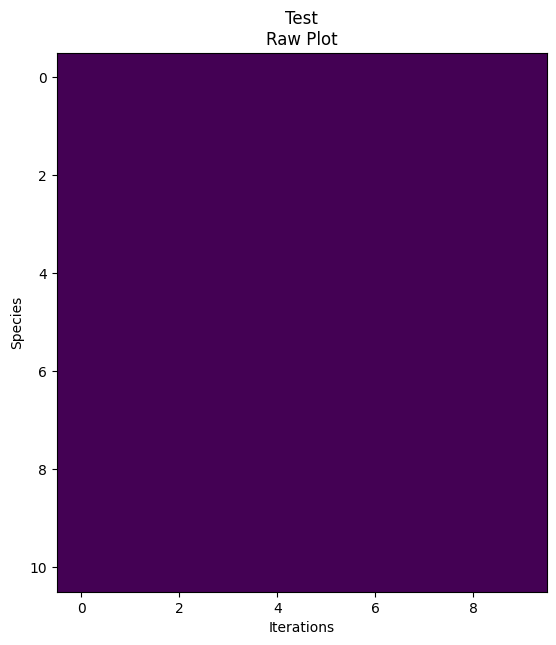

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='simple',walk_index=1, abstraction_type='c', title="Test")
plt.show()

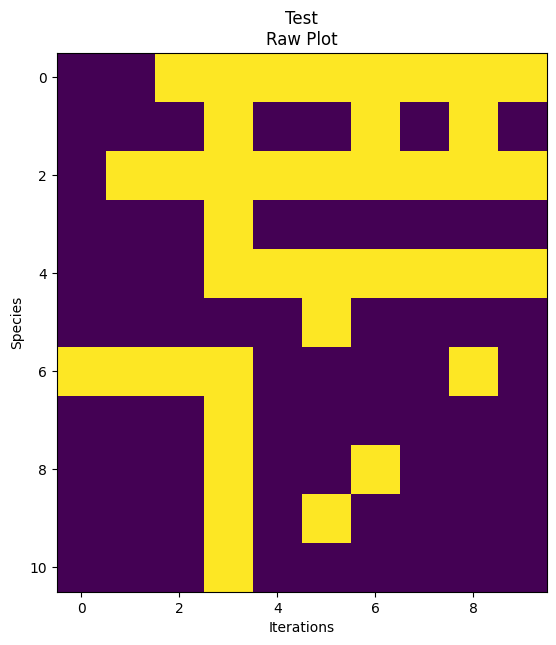

In [11]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='mak',walk_index=1, abstraction_type='a', title="Test")
plt.show()

The folowing correspond to the evolutionary change of random walk, recives the same arguments as the latter, but whit added plot options (`show_indices, index_spacing` and `legend`) 

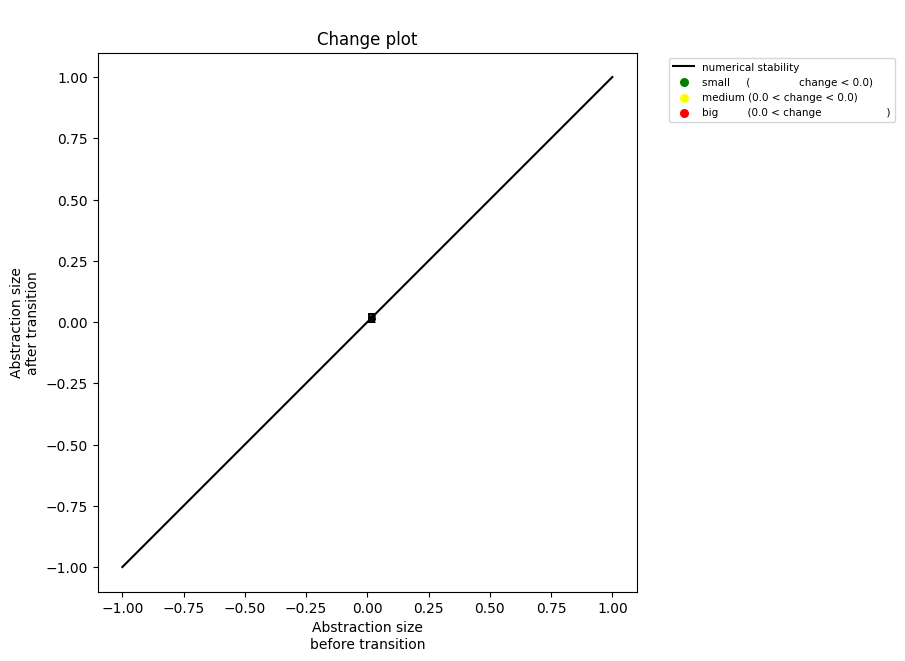

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='simple',walk_index=0, abstraction_type='c', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

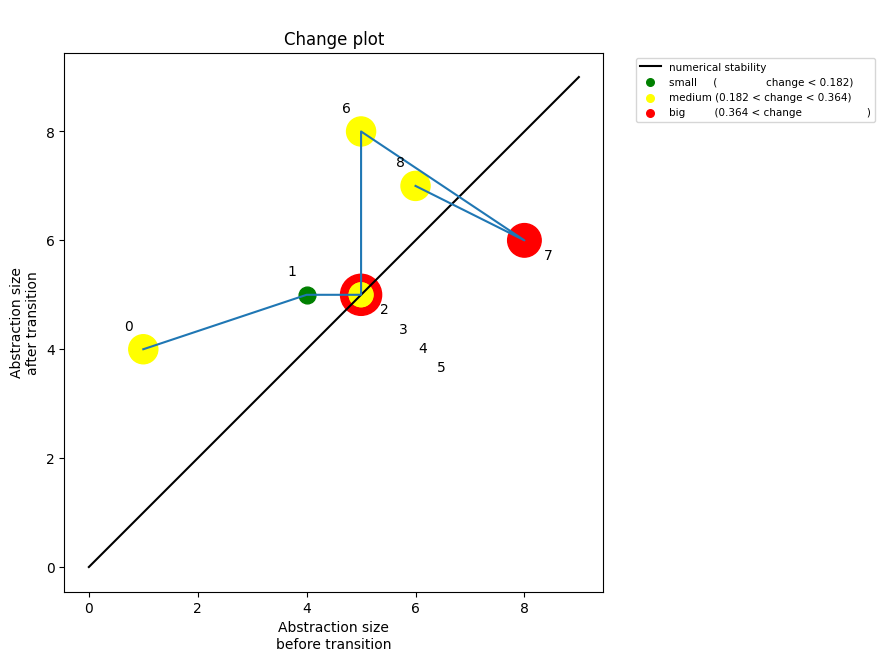

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='mak',walk_index=0, abstraction_type='a', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

Two plot for for the evolutionary trajectories are plotted. The first of these considers the possibility of plotting all repetitions of the random walks of the network. The second can plot the perturbations and their convergent states for a particular walk. The fist one recive similar arguments as the latter function, but here the variable `walk_indexes` correspond to a list of keys of the walks to plot, is this variable is `None` then the function will plot all of the walks. The `loga` change the scale to logaritmic.  

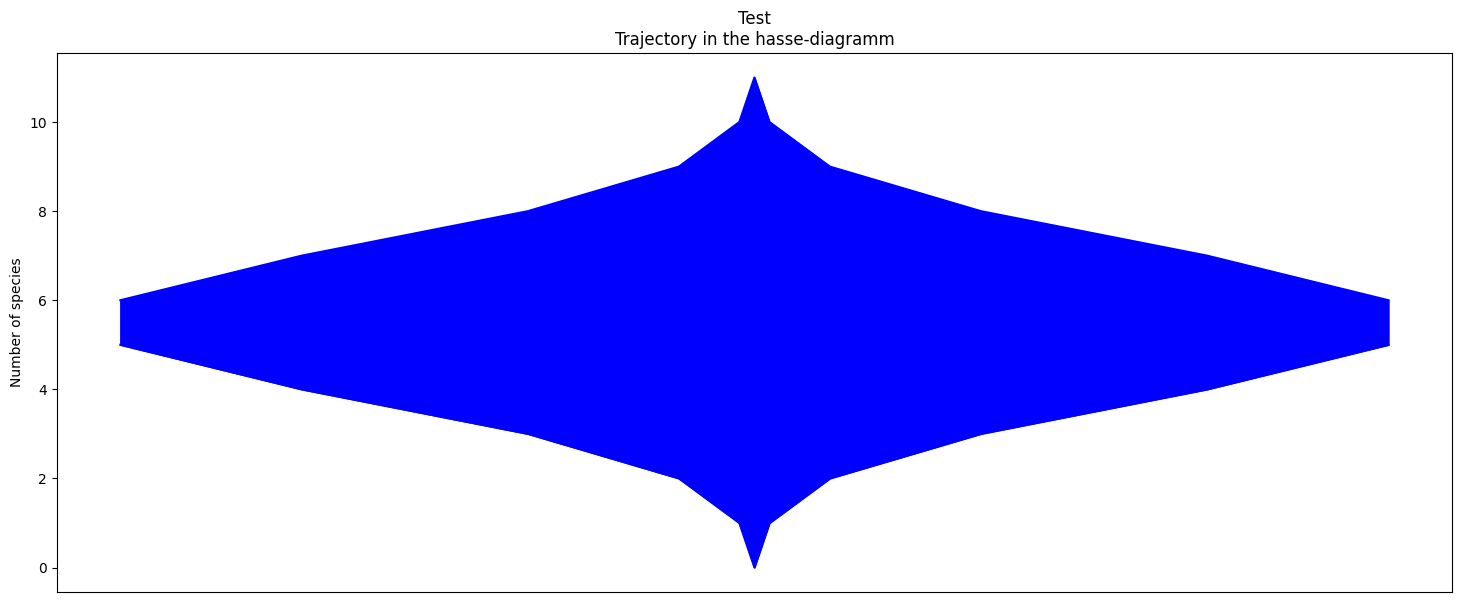

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='simple', walk_indexes=None, abstraction_type='c', title='Test', loga=False)
 
plt.show()

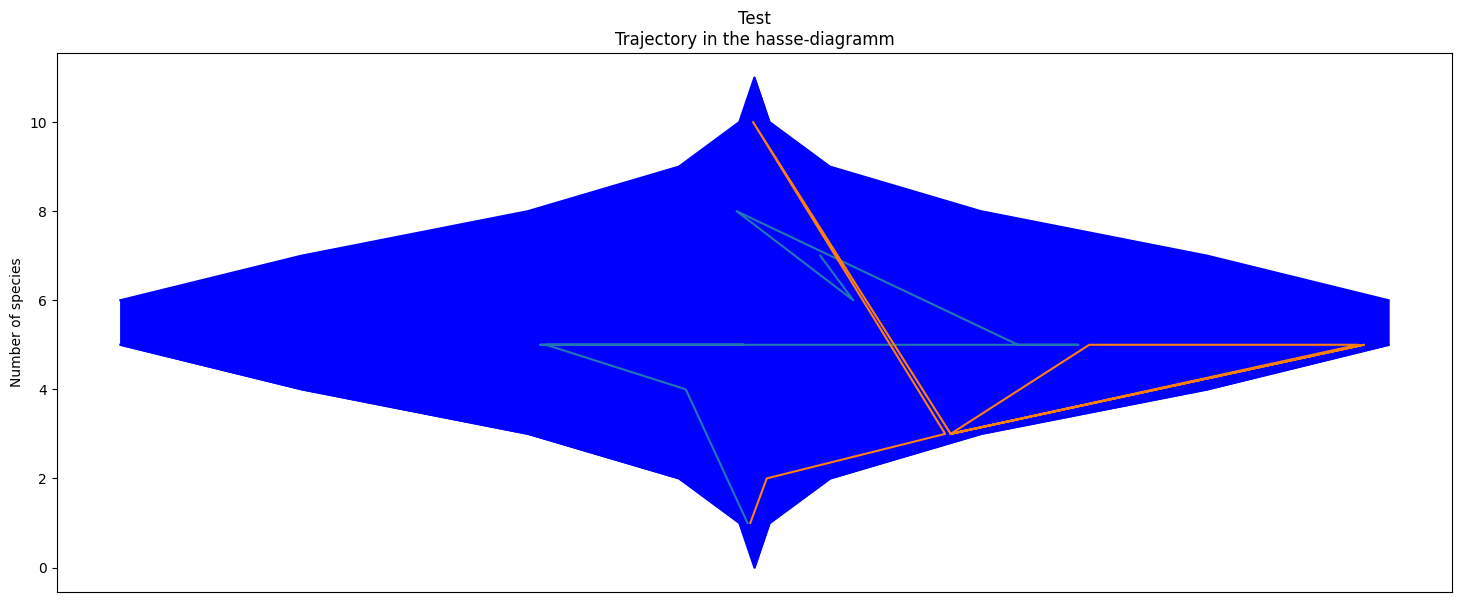

In [15]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='mak', walk_indexes=None, abstraction_type='a', title='Test', loga=False)
 
plt.show()

As describe before, this function describe a specific random walk considering the convergent and perturbed steps. Here again the `walk_index` variable correspond to the key of the random walk to be ploted.

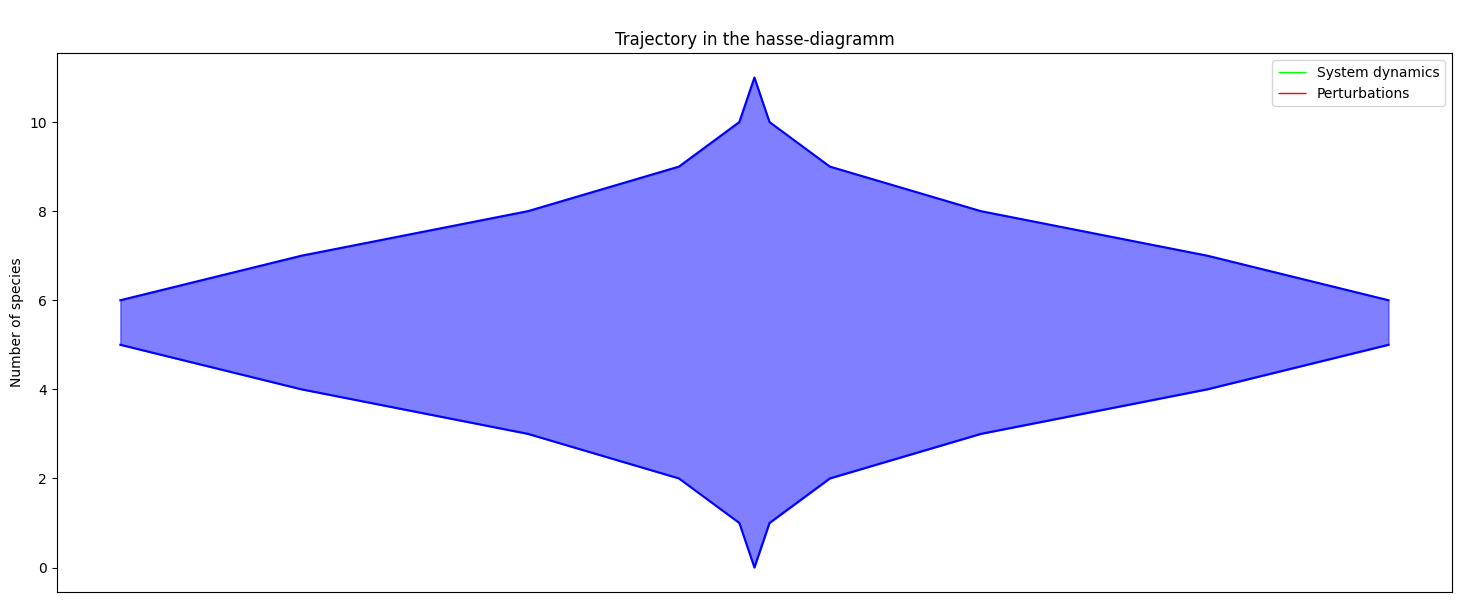

In [16]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='simple', walk_index=0,  
                                              convergent_abstraction_type='c',
                                              title='', loga=False)
plt.show()

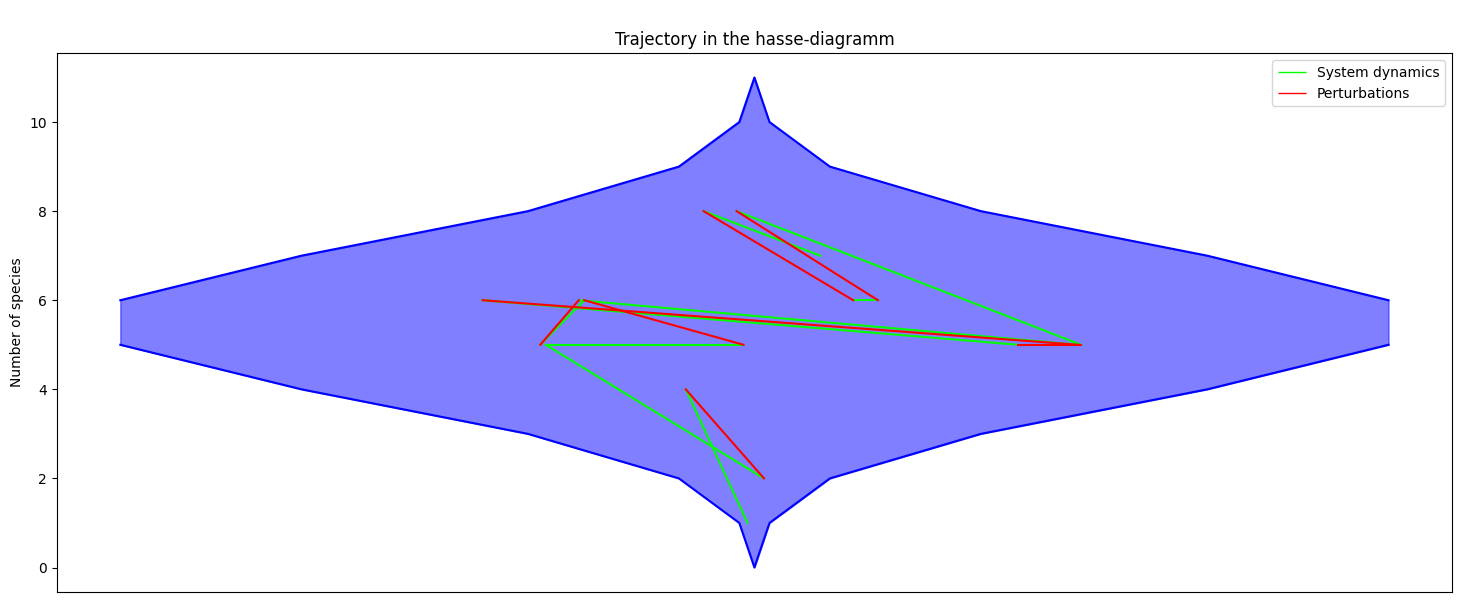

In [17]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='mak', walk_index=0,  
                                              convergent_abstraction_type='a',
                                              title='', loga=False)
plt.show()

It is also possible to obtain datraframes with resilience measures of the simulated random walks, by means of the function `getAbstrationTransitionDf`. This function receives the same arguments as the previous functions plus the complexity identification key `complexity_type`. Two dataframes are obtained, one with the abstraction data and their resilient properties, and the other with the transitions. 